# Seminario Prueba I

* Loading modules

In [2]:
# My neural net model
from neural_net import neural_net

# Linear algebra library
import numpy as np
import scipy.optimize as op
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 5) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

In [3]:
def plotData(X, y, y_pred): 
    plt.subplot(2, 1, 1)
    plt.title('real')
    cross, = plt.plot([],[],'rx')
    good, = plt.plot([],[],'go')
    for i in range(len(y)):
        if y[i] == 0:
            plt.plot(X[i,0], X[i,1], 'rx')
        else:
            plt.plot(X[i,0],X[i,1], 'go')
    plt.legend(handles = [cross, good], labels = ['False', 'True'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.tight_layout()
    
    plt.subplot(2, 1, 2)
    plt.title('predicción')
    for i in range(len(y_pred)):
        if y_pred[i] == 0:
            plt.plot(X[i,0], X[i,1], 'rx')
        else:
            plt.plot(X[i,0],X[i,1], 'go')
            
    plt.legend(handles = [cross, good], labels = ['False', 'True'],bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
    plt.tight_layout()
    plt.show()

In [4]:
def gradientCheck(net,X_temp, y, grads, reg = 0.0):
    grad = {}
    for param_name in net.function_params:
        fun = lambda W: net.loss_function(X_temp, y, reg)
        grad[param_name] = net.checkGradient(fun, net.function_params[param_name])
    for key in grad:
        print(f'difference {key}', np.linalg.norm(grad[key] - grads[key]))

In [5]:
def plotStats(results):
    # Plot the loss function and train / validation accuracies
    plt.subplot(2, 1, 1)
    plt.plot(results['loss_history'])
    plt.title('Loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Loss')

    plt.subplot(2, 1, 2)
    plt.plot(results['train_acc_history'], label='train')
    plt.plot(results['val_acc_history'], label='val')
    plt.title('Classification accuracy history')
    plt.xlabel('Epoch')
    plt.ylabel('Clasification accuracy')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [6]:
from vis_utils import visualize_grid_withoutRGB, visualize_grid
def show_net_weights(net, Wkey):
    plt.figure(figsize=(7,7))
    W1 = net.function_params[Wkey]
    Z, N = W1.shape
    size = int(np.sqrt(Z))
    W1 = W1.reshape(size, size,-1).transpose(2,0,1)
    print(W1.shape)
    plt.imshow(visualize_grid_withoutRGB(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

In [7]:
def show_net_weights_rgb(net):
    plt.rcParams['figure.figsize'] = (12, 12) # set default size of plots
    plt.figure(figsize=(7,7))
    W1 = net.function_params['W1']
    W1 = W1.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2)
    W1 = W1[0:5].reshape(5, 32, 32, 3)
    plt.imshow(visualize_grid(W1, padding=3).astype('uint8'))
    plt.gca().axis('off')
    plt.show()

In [10]:
# if activaction_function = 'Sigmoid' and cost_function='Entropy_Loss':
# 0<ol_size
# if activaction_function = 'ReLu' and cost_function = 'Softmax':
# 1<ol_size
activaction_function = 'Sigmoid'
cost_function = 'Entropy_Loss'

## Operadores lógicos básicos
* &
* |
* ->
* <->
* xor

### AND

In [87]:
# Initialize variables
X = np.array([[1,1],
              [1,0],
              [0,1],
              [0,0]])

y = np.array([1,0,0,0])


In [88]:
net_params = {'il':2,'hl1':5,'ol':2}

In [98]:
net = neural_net(net_params, activaction_function='ReLu', cost_function='SoftMax')
results = net.train_stochastic_gradient_descent(X, y, X, y, reg = 0, verbose = True, learning_rate = 0.09, max_iter = 5000
                                    , learning_rate_decay=0.99, batch_size=1)

iteration 4999 / 5000, loss 0.0205: 100%|██████████| 5000/5000 [00:02<00:00, 1903.78it/s]


In [83]:
net = neural_net(net_params, activaction_function='ReLu', cost_function='SoftMax')
results = net.train_gradient_descent(X, y, X, y, reg = 0, verbose = True, learning_rate = 0.09, max_iter = 1000
                                    , learning_rate_decay=0.99, batch_size=1)

iteration 999 / 1000, loss 0.0251: 100%|██████████| 1000/1000 [00:00<00:00, 2027.35it/s]


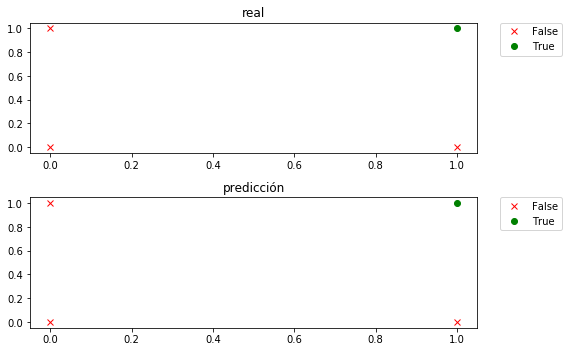

In [99]:
y_pred = net.predict(X)
plotData(X, y, y_pred)

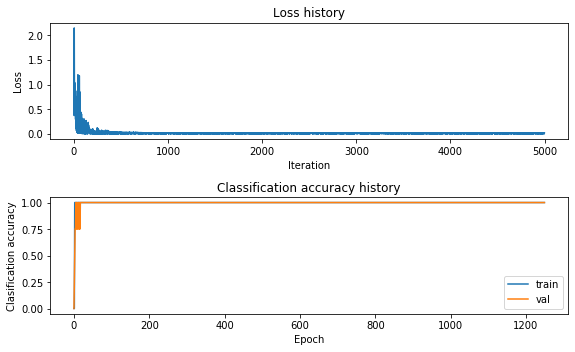

In [100]:
plotStats(results)

In [101]:
print(f'y-predict = {y_pred}, y-real = {y}')

y-predict = [1 0 0 0], y-real = [1 0 0 0]


### OR

In [ ]:
X = np.array([[1,1],
              [1,0],
              [0,1],
              [0,0]])
y = np.array([[1],
              [1],
              [1],
              [0]])

In [ ]:
net_params = {'il':2,'hl1':2, 'ol':2}

In [ ]:
net = neural_net(net_params)

In [ ]:
grads = net.back_prop(X, y)
gradientCheck(net, X, y, grads)

In [ ]:
y_pred = net.predict(X)
plotData(X, y, y_pred)

In [ ]:
results = net.train_stochastic_gradient_descent(X, y, X, y, reg = 0.5, verbose = True, 
                                                learning_rate = 1.9, max_iter = 5000
                                    ,learning_rate_decay=0.99, batch_size=1)

In [ ]:
y_pred = net.predict(X)
plotData(X, y, y_pred)

In [ ]:
plotStats(results)

In [ ]:
print(f'y-predict = {y_pred}, y-real = {y.T}')

### => Conditional

In [ ]:
X = np.array([[1,1],
              [1,0],
              [0,1],
              [0,0]])

y = np.array([[1],
              [0],
              [1],
              [1]])

In [ ]:
net_params = {'il':2, 'ol': 2}

In [ ]:
net = neural_net(net_params)

In [ ]:
y_pred = net.predict(X)
plotData(X, y, y_pred)

In [ ]:
results = net.train_stochastic_gradient_descent(X, y, X, y, reg = 0, verbose = True, 
                                                learning_rate = 0.5, max_iter = 500
                                    ,learning_rate_decay=0.99, batch_size=1)

In [ ]:
y_pred = net.predict(X)
plotData(X, y, y_pred)

In [ ]:
plotStats(results)

### iff, biconditional

In [7]:
X = np.array([[1,1],
              [1,0],
              [0,1],
              [0,0]])
y = np.array([[1],
              [0],
              [0],
              [1]])

In [17]:
net_params = {'il':2, 'hl1':500,'ol':2}

In [18]:
net = neural_net(net_params)

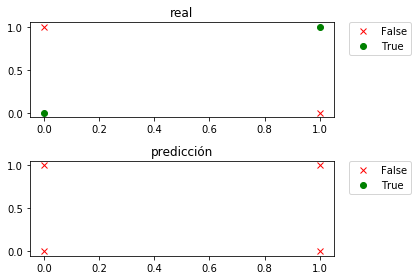

In [19]:
y_pred = net.predict(X)
plotData(X, y, y_pred)

In [ ]:
results = net.train_stochastic_gradient_descent(X, y, X, y, reg = 0, verbose = True, 
                                                learning_rate = 1e-4, max_iter = 10000
                                    ,learning_rate_decay=0.99, batch_size=1)

iteration 882 / 10000, loss 0.694:   9%|▉         | 882/10000 [00:02<00:23, 389.94it/s] 

In [ ]:
y_pred = net.predict(X)
plotData(X, y, y_pred)

In [ ]:
plotStats(results)

In [ ]:
# Let's change the neural net architecture
net_params = {'il': 2, 'hl1': 2, 'ol':2}

In [ ]:
net =  neural_net(net_params)

In [ ]:
y_pred = net.predict(X)
plotData(X, y, y_pred)

In [ ]:
results = results = net.train_stochastic_gradient_descent(X, y, X, y, reg = 0, verbose = True, 
                                                learning_rate = 1e-1, max_iter = 5000
                                    ,learning_rate_decay=0.99, batch_size=1)

In [ ]:
y_pred = net.predict(X)
plotData(X, y, y_pred)

In [ ]:
plotStats(results)

In [ ]:
net_params = {'il':2, 'hl1':4, 'ol':2}

In [ ]:
net = neural_net(net_params)

In [ ]:
y_pred = net.predict(X)
plotData(X, y, y_pred)

In [ ]:
grads = net.back_prop(X, y)
gradientCheck(net, X, y, grads)

In [ ]:
results = results = net.train_gradient_descent(X, y, X, y, reg = 0, verbose = True, 
                                                learning_rate = 1.0, max_iter = 5000
                                    ,learning_rate_decay=0.99, batch_size=1)

In [ ]:
y_pred = net.predict(X)
plotData(X, y, y_pred)

In [ ]:
plotStats(results)

### XOR

In [ ]:
X = np.array([[1,1],
              [1,0],
              [0,1],
              [0,0]])
y = np.array([[0],
              [1],
              [1],
              [0]])

In [ ]:
net_params = {'il':2, 'hl1':5, 'ol': 2}

In [ ]:
net = neural_net(net_params)

In [ ]:
grads = net.back_prop(X, y)
gradientCheck(net, X, y, grads)

In [ ]:
# Using gradient descent
results = results = net.train_stochastic_gradient_descent(X, y, X, y, reg = 0.002, verbose = True, 
                                                learning_rate = 0.00005, max_iter = 5000
                                    ,learning_rate_decay=0.99, batch_size=1)

In [ ]:
y_pred = net.predict(X)
plotData(X, y, y_pred)

In [ ]:
plotStats(results)

# Probando con Imagenes
* Cargar MNIST Data digits

In [ ]:
from scipy.io import loadmat
from mlxtend.data import loadlocal_mnist

In [ ]:
digits_image_path = 'data/train_images'
digits_labels_path = 'data/train_labels'

In [ ]:
images, labels = loadlocal_mnist(images_path= digits_image_path, labels_path = digits_labels_path)
images_test, labels_test = loadlocal_mnist(images_path = 'data/test_images', labels_path = 'data/test_labels')

In [ ]:
images = images.astype(int)
print(f'shape of images dataset : {images.shape}')
# labels = labels.astype(int).reshape(len(labels), 1)# Conver the (10000,) array to a matrix (10000, 1)
labels = labels.astype(int)
print(f'shape of labels dataset : {labels.shape} ')
images_test = images_test.astype(int)
print(f'shape of images_test dataset : {images_test.shape}')
labels_test = labels_test.astype(int)
# labels_test = labels_test.astype(int).reshape(len(labels_test), 1)
print(f'shape of labels_test dataset : {labels_test.shape} ')

In [ ]:
# Let's see some images
num_images = 10
num_samples, pixels_square = images.shape
pixel_size = int(np.sqrt(pixels_square))
idx = np.random.choice(num_samples, num_images)
for i in range(10):
    plt.imshow(images[idx[i]].reshape(pixel_size,pixel_size), cmap='gray')
    plt.show()

In [ ]:
net_params = {'il': pixels_square, 'hl1': 25, 'ol': 10} #25 hidden_size is not enough
# net_params = {'il': pixels_square, 'hl1': 100, 'ol': 10}

In [ ]:
net = neural_net(net_params, activaction_function = 'ReLu', cost_function = 'SoftMax')

In [ ]:
images = images.reshape(num_samples, pixel_size, pixel_size)
images.shape

In [ ]:
images_test = images_test.reshape(images_test.shape[0], 28, 28)
images_test.shape

In [ ]:
X = images - np.mean(images, axis = 0) # Normalize the data is very important for fastest converge
X_test = images_test - np.mean(images, axis = 0)

In [ ]:
# X = images
X_test = X_test.reshape(X_test.shape[0], -1)
X = X.reshape(num_samples, -1)

In [ ]:
y = labels
y_test = labels_test

In [ ]:
print(X.shape)
print(X_test.shape)
print(y.shape)
print(y_test.shape)

In [ ]:
results = net.train_stochastic_gradient_descent(X, y, X_test, y_test, learning_rate=9.617504e-3 , max_iter= 3000,
                                     verbose = True, reg = 7.1815e-7)

In [ ]:
plotStats(results)

In [ ]:
show_net_weights(net, 'W1')

In [ ]:
(net.predict(X) == y).mean() * 100

In [ ]:
(net.predict(X_test) == y_test).mean() * 100

In [ ]:
# Let's see some images
q = ''
while q == '':
    idx = np.random.choice(y_test.shape[0])
    print(f'the number is {y_pred[idx]}, {y_test[idx]}')
    plt.imshow(images_test[idx])
    plt.show()
    q = input('')

In [ ]:
input_dim = X.shape[1]
hidden_dim = 500
num_classes = 10

#net = TwoLayerNet(input_dim, hidden_dim, num_classes)
best_net = None
best_val = -1

def generate_random_hyperparams(lr_min, lr_max, reg_min, reg_max, h_min, h_max):
    lr = 10**np.random.uniform(lr_min,lr_max)
    reg = 10**np.random.uniform(reg_min,reg_max)
    hidden = np.random.randint(h_min, h_max)
    return lr, reg, hidden

In [ ]:
# Use of random search for hyperparameter search
for i in range(20):
    lr, reg, hidden_dim = generate_random_hyperparams(-1, 0, -7, -4, 10, 500)
    # Create a two-layer network
    net_params = {'il': input_dim, 'hl1': hidden_dim, 'ol': num_classes}
    net = neural_net(net_params)
    
    # Train the network
    stats = net.train_stochastic_gradient_descent(X, y, X_test, y_test,
                max_iter=3000, batch_size=200,
                learning_rate=lr, learning_rate_decay=0.95,
                reg=reg, verbose=True)

    # Predict on the training set
    train_accuracy = (net.predict(X) == y).mean()
    
    # Predict on the validation set
    val_accuracy = (net.predict(X_test) == y_test).mean()
    
    # Save best values
    if val_accuracy > best_val:
        best_val = val_accuracy
        best_net = net
    
    # Print results
    print('lr %e reg %e hid %d  train accuracy: %f val accuracy: %f' % (
                lr, reg, hidden_dim, train_accuracy, val_accuracy))
print('best validation accuracy achieved: %f' % best_val)

In [ ]:
show_net_weights(best_net, 'W1')

In [ ]:
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from PIL import Image
import PIL.ImageOps
image_new_path = 'data/7.png'
IMAGE_WIDTH=28
IMAGE_HEIGHT=28
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
img = load_img(image_new_path)
img = img.resize((IMAGE_SIZE), Image.NEAREST)
img = PIL.ImageOps.invert(img)
img_array = img_to_array(img)
img_array = img_array.mean(axis = 2)
img_array -= np.mean(images, axis = 0)
plt.imshow(img_array)
plt.show()
img_array = img_array.reshape(1, 28*28)


In [ ]:
img_array.shape

In [ ]:
net.predict(img_array)

# Load CIFAR 10 data sets

In [8]:
from data_utils import load_CIFAR10

def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):

    # Load the raw CIFAR-10 data
    cifar10_dir = 'data/cifar-10-batches-py'
    
    X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
        
    # Subsample the data
    mask = list(range(num_training, num_training + num_validation))
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = list(range(num_training))
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = list(range(num_test))
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    # Reshape data to rows
    X_train = X_train.reshape(num_training, -1)
    X_val = X_val.reshape(num_validation, -1)
    X_test = X_test.reshape(num_test, -1)

    return X_train, y_train, X_val, y_val, X_test, y_test, mean_image


# Cleaning up variables to prevent loading data multiple times (which may cause memory issue)
try:
    del X_train, y_train
    del X_test, y_test
    del X, y
    print('Clear previously loaded data.')
except:
    pass

# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test, mean_image = get_CIFAR10_data()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 3072)
Train labels shape:  (49000,)
Validation data shape:  (1000, 3072)
Validation labels shape:  (1000,)
Test data shape:  (1000, 3072)
Test labels shape:  (1000,)


In [9]:
X_tiny = X_train[:20]
y_tiny = y_train[:20]

In [10]:
input_dim = X_tiny.shape[1]
hidden_dim = 500
num_classes = 10

best_net = None
best_val = -1

def generate_random_hyperparams(lr_min, lr_max, reg_min, reg_max, h_min, h_max):
    reg = 10**np.random.uniform(reg_min,reg_max)
    hidden = np.random.randint(h_min, h_max)
    return reg, hidden

In [11]:
# Use of random search for hyperparameter search
for i in range(20):
    reg, hidden_dim = generate_random_hyperparams(-1, 0, -7, -4, 10, 500)
    lr = 1.641209e-6
    # Create a two-layer network
    net_params = {'il': input_dim, 'hl1': hidden_dim, 'ol': num_classes}
    net = neural_net(net_params)
    
    # Train the network
    stats = net.train_stochastic_gradient_descent(X_tiny, y_tiny, X_tiny, y_tiny,
                max_iter=500, batch_size=2,
                learning_rate=lr, learning_rate_decay=0.99,
                reg=0.0, verbose=True)

    # Predict on the training set
    train_accuracy = (net.predict(X_tiny) == y_tiny).mean()
    
    # Predict on the validation set
    val_accuracy = (net.predict(X_tiny) == y_tiny).mean()
    
    # Save best values
    if val_accuracy > best_val:
        best_val = val_accuracy
        best_net = net
    
    # Print results
    print('lr %e reg %e hid %d  train accuracy: %f val accuracy: %f' % (
                lr, reg, hidden_dim, train_accuracy, val_accuracy))
print('best validation accuracy achieved: %f' % best_val)

iteration 499 / 500, loss 0.0011: 100%|█████████▉| 499/500 [00:12<00:00, 41.19it/s]

lr 1.641209e-06 reg 1.419667e-06 hid 313  train accuracy: 1.000000 val accuracy: 1.000000
lr 1.641209e-06 reg 5.374952e-07 hid 488  train accuracy: 1.000000 val accuracy: 1.000000

iteration 499 / 500, loss 0.0034: 100%|█████████▉| 499/500 [00:11<00:00, 45.85it/s]


lr 1.641209e-06 reg 7.565449e-06 hid 448  train accuracy: 1.000000 val accuracy: 1.000000

iteration 499 / 500, loss 0.0: 100%|█████████▉| 499/500 [00:10<00:00, 46.85it/s]   


lr 1.641209e-06 reg 1.727868e-05 hid 401  train accuracy: 1.000000 val accuracy: 1.000000

iteration 499 / 500, loss 0.0053: 100%|█████████▉| 499/500 [00:06<00:00, 72.98it/s]


lr 1.641209e-06 reg 8.701495e-05 hid 274  train accuracy: 1.000000 val accuracy: 1.000000

iteration 499 / 500, loss 0.0022: 100%|██████████| 500/500 [00:06<00:00, 77.38it/s]


lr 1.641209e-06 reg 3.290521e-07 hid 260  train accuracy: 1.000000 val accuracy: 1.000000


iteration 499 / 500, loss 0.0: 100%|█████████▉| 499/500 [00:12<00:00, 42.77it/s]   


lr 1.641209e-06 reg 2.129774e-06 hid 491  train accuracy: 1.000000 val accuracy: 1.000000

iteration 499 / 500, loss 0.0015: 100%|█████████▉| 499/500 [00:04<00:00, 120.29it/s]


lr 1.641209e-06 reg 6.262199e-05 hid 167  train accuracy: 1.000000 val accuracy: 1.000000

iteration 499 / 500, loss 0.0015: 100%|█████████▉| 499/500 [00:10<00:00, 48.45it/s]


lr 1.641209e-06 reg 4.187805e-05 hid 403  train accuracy: 1.000000 val accuracy: 1.000000

iteration 499 / 500, loss 0.0: 100%|██████████| 500/500 [00:09<00:00, 58.05it/s]


lr 1.641209e-06 reg 9.695380e-07 hid 363  train accuracy: 1.000000 val accuracy: 1.000000

iteration 499 / 500, loss 0.0001: 100%|█████████▉| 499/500 [00:07<00:00, 68.08it/s]


lr 1.641209e-06 reg 8.523010e-05 hid 294  train accuracy: 1.000000 val accuracy: 1.000000

iteration 499 / 500, loss 0.0007: 100%|██████████| 500/500 [00:09<00:00, 55.23it/s]


lr 1.641209e-06 reg 8.397828e-07 hid 342  train accuracy: 1.000000 val accuracy: 1.000000


iteration 499 / 500, loss 0.0003: 100%|█████████▉| 499/500 [00:09<00:00, 55.05it/s]


lr 1.641209e-06 reg 6.261840e-06 hid 351  train accuracy: 1.000000 val accuracy: 1.000000

iteration 499 / 500, loss 0.0007: 100%|█████████▉| 499/500 [00:02<00:00, 200.39it/s]


lr 1.641209e-06 reg 1.236368e-07 hid 86  train accuracy: 1.000000 val accuracy: 1.000000

iteration 499 / 500, loss 0.0002: 100%|██████████| 500/500 [00:02<00:00, 201.24it/s]


lr 1.641209e-06 reg 1.727981e-05 hid 88  train accuracy: 0.950000 val accuracy: 0.950000


iteration 499 / 500, loss 0.0014: 100%|█████████▉| 499/500 [00:08<00:00, 62.47it/s]


lr 1.641209e-06 reg 2.185259e-05 hid 317  train accuracy: 0.950000 val accuracy: 0.950000

iteration 499 / 500, loss 0.0003: 100%|██████████| 500/500 [00:04<00:00, 120.66it/s]


lr 1.641209e-06 reg 1.108622e-06 hid 160  train accuracy: 1.000000 val accuracy: 1.000000


iteration 499 / 500, loss 0.0: 100%|█████████▉| 499/500 [00:11<00:00, 44.52it/s]   


lr 1.641209e-06 reg 8.747150e-06 hid 463  train accuracy: 1.000000 val accuracy: 1.000000

iteration 499 / 500, loss 0.0026: 100%|██████████| 500/500 [00:12<00:00, 43.59it/s]


lr 1.641209e-06 reg 4.882718e-07 hid 475  train accuracy: 1.000000 val accuracy: 1.000000

iteration 499 / 500, loss 0.0003: 100%|█████████▉| 499/500 [00:12<00:00, 43.31it/s]


lr 1.641209e-06 reg 1.781428e-05 hid 458  train accuracy: 1.000000 val accuracy: 1.000000
best validation accuracy achieved: 1.000000


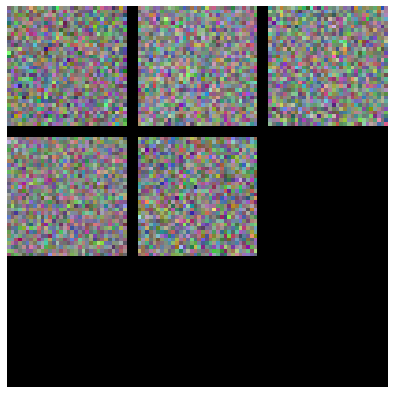

In [12]:
show_net_weights_rgb(best_net)

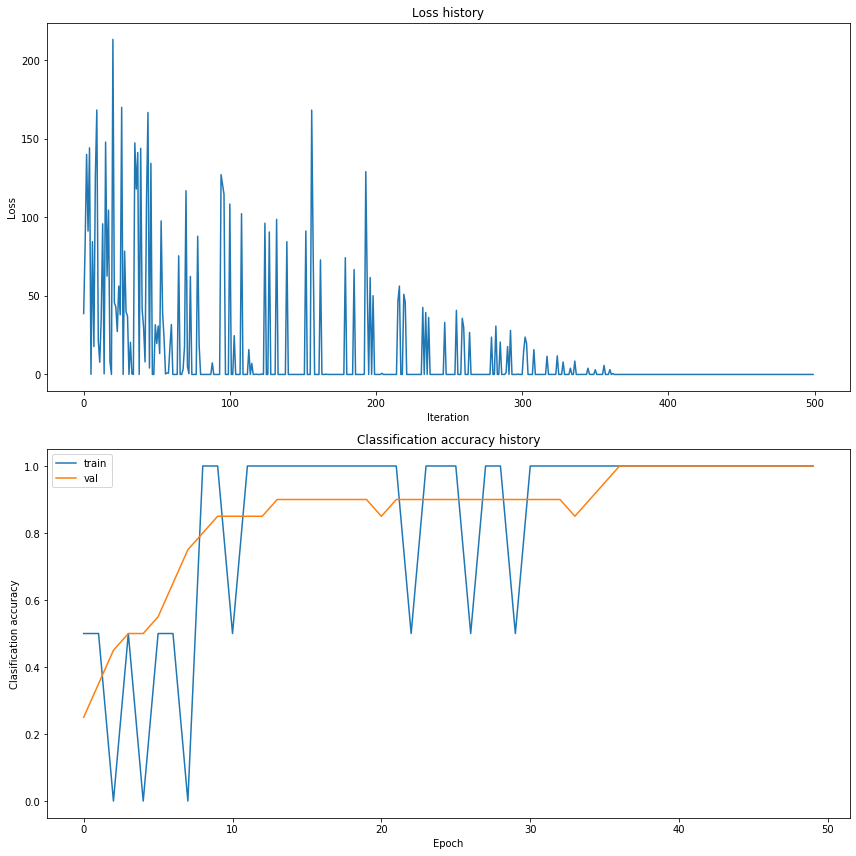

In [13]:
plotStats(stats)

In [36]:
net_params = {'il': 3072, 'hl1':150, 'hl2':150, 'ol':10}
net = neural_net(net_params)
stats = net.train_gradient_descent(X_tiny, y_tiny, X_tiny, y_tiny, max_iter = 1000, batch_size=1,
            learning_rate=1.641209e-6, learning_rate_decay=0.99,
            reg=0.0, verbose=True)

iteration 999 / 1000, loss 0.0012: 100%|█████████▉| 999/1000 [00:08<00:00, 115.98it/s]

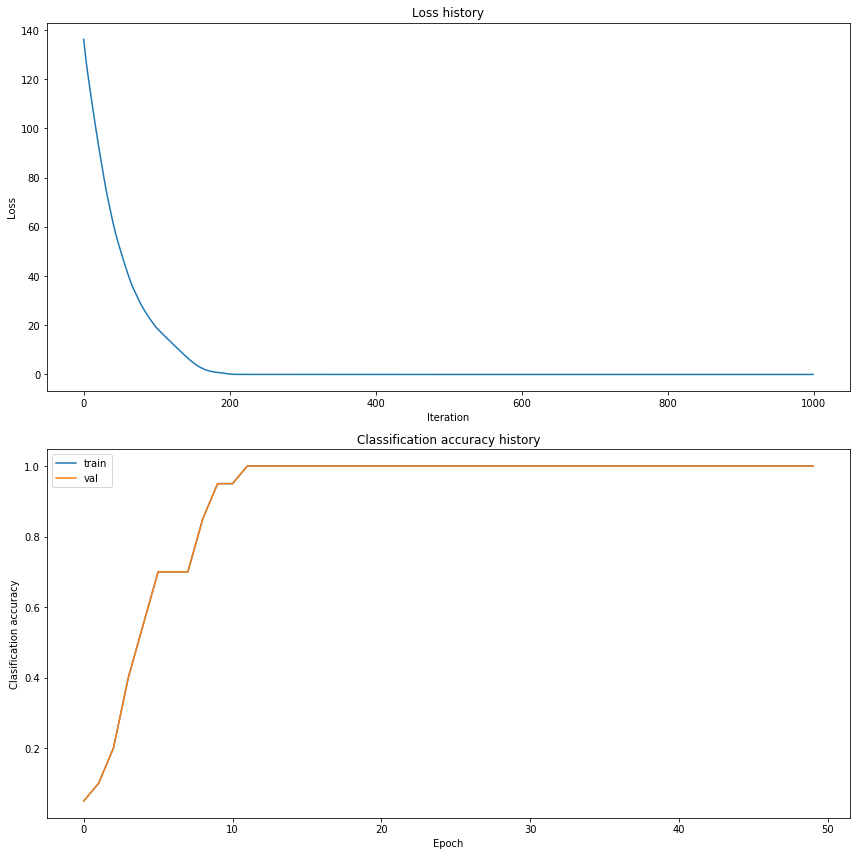

In [37]:
plotStats(stats)

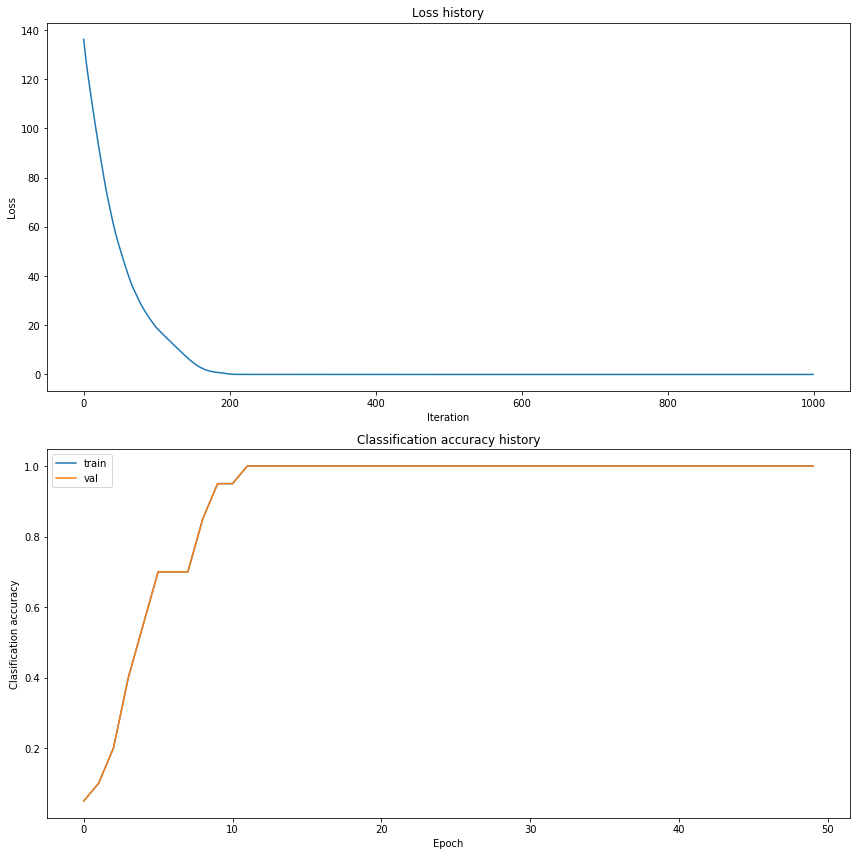

In [38]:
plotStats(stats)

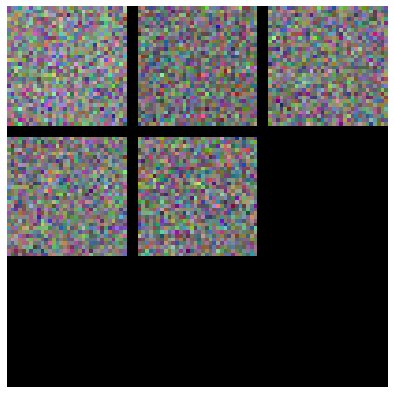

In [39]:
show_net_weights_rgb(net)

In [ ]:
val_acc = (net.predict(X_val) == y_val).mean()
print('Validation accuracy: ', val_acc)

In [ ]:
y_val_pred = net.predict(X_val)
print('finish val prediction')
y_train_pred = net.predict(X_train)
print('finish train prediction')
y_test_pred = net.predict(X_test)
print('finish test prediction')

In [ ]:
test_acc = (net.predict(X_test) == y_test).mean()
print('Validation accuracy: ', test_acc)

In [ ]:
train_acc = (net.predict(X_train) == y_train).mean()
print('train accuracy: ', train_acc)

In [ ]:
#X_train = X_train.reshape(32, 32, 3, -1).transpose(3, 0, 1, 2) + mean_image
X_train = X_train.reshape(X_train.shape[0], 32,32,3) + mean_image

In [ ]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plt.rcParams['figure.figsize'] = (20, 20) # set default size of plots
examples_per_class = 11
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_train == cls) & (y_train_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_train[idx].reshape(32,32,3).astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

## Proof of the ReLu model

In [ ]:
input_size = 2
hidden_size = 2
num_classes = 3
num_inputs = 5

def init_toy_model():
    np.random.seed(0)
    net_params = {'il': input_size, 'hl1': hidden_size, 'ol': num_classes}
    return neural_net(net_params, std=1e-1)

def init_toy_data():
    np.random.seed(1)
    X = 10 * np.random.randn(num_inputs, input_size)
    y = np.array([0, 1, 2, 2, 1])
#     y = y.reshape(len(y),1)
    return X, y

net = init_toy_model()
X, y = init_toy_data()


In [ ]:
scores = net.feed_forward(X)
print('Your scores:')
print(scores)
print()
print('correct scores:')
correct_scores = np.asarray([
  [-0.81233741, -1.27654624, -0.70335995],
  [-0.17129677, -1.18803311, -0.47310444],
  [-0.51590475, -1.01354314, -0.8504215 ],
  [-0.15419291, -0.48629638, -0.52901952],
  [-0.00618733, -0.12435261, -0.15226949]])
print(correct_scores)
print()

# The difference should be very small. We get < 1e-7
print('Difference between your scores and correct scores:')
print(np.sum(np.abs(scores - correct_scores)))

In [ ]:
loss, _ = net.loss(X, y, reg = 0.05)
print(loss)
correct_loss = 1.30378789133

# should be very small, we get < 1e-12
print('Difference between your loss and correct loss:')
print(np.sum(np.abs(loss - correct_loss)))

In [ ]:
_, grads = net.loss(X, y, reg = 0.05)
grads

In [ ]:
grads = net.back_prop(X, y, reg = 0.05)
grads

In [ ]:
# grads = net.back_prop(X, y, reg = 0.05)
grad = {}
for param_name in net.function_params:
    fun = lambda W: net.loss_function(X,y, reg = 0.05)
    grad[param_name] = net.checkGradient(fun, net.function_params[param_name], verbose = False)

In [ ]:
for key in grad:
    print(f'difference {key}', np.linalg.norm(grad[key] - grads[key]))

In [ ]:
grad = {}
for param_name in net.function_params:
    fun = lambda W: net.loss(X,y, reg = 0.05)[0]
    grad[param_name] = net.checkGradient(fun, net.function_params[param_name], verbose = False)

In [ ]:
for key in grad:
    print(f'difference {key}', np.linalg.norm(grad[key] - grads[key]))

In [ ]:
net = init_toy_model()
stats = net.train_stochastic_gradient_descent(X, y, X, y,
            learning_rate=1e-1, reg=5e-6,
            max_iter=1000, verbose=True)

In [ ]:
print('Final training loss: ', stats['loss_history'][-1])

# plot the loss history
plt.plot(stats['loss_history'])
plt.xlabel('iteration')
plt.ylabel('training loss')
plt.title('Training Loss history')
plt.show()

## Conv net